In [1]:
! python --version

Python 3.7.3


In [2]:
# load data
import numpy as np 
import pandas as pd
import random

# clean data
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

from imblearn.over_sampling import SMOTE

# build model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# evaluate model
from sklearn.metrics import classification_report

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# personal tools
import sys
sys.path.append('../src')
import tools as tl
from DataLoader import DataLoader

# others
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


# Le chargement des données et l'exploration

## Chargement des données

In [3]:
data_loader = DataLoader('../data/input/creditcard.csv')

In [4]:
df = data_loader.raw_data

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


D'abord, j'ai charger les données et essayé de les comprendre.

Il y a 31 colonnes. Puisqu'il n'y a pas de description de dataset, j'ai fait quelque suppositions.
* Les colonnes de `V1` à `V28` sont les informations encodées sur les transactions. 
* La colonne `Time` contient les chiffres entre 0.0 et 172792.0. Elles sont les nombres de secondes entre ces transactions et la première transaction.
* La colonne `Amount` contient les montants des transactions.
* `Class` indique les transactions sont frauduleuses (labélisées comme `1`) ou innocentes (labélisées comme `0`).


## Variables

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a pas de valeur manquante dans ce dataset.

### V1 - V28

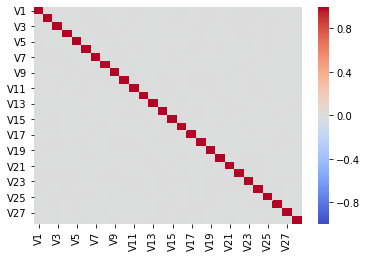

In [9]:
v_df = df[['V'+str(i) for i in range(1,29)]]
sns.heatmap(v_df.corr(), vmin = -1, vmax = 1, cmap='coolwarm')

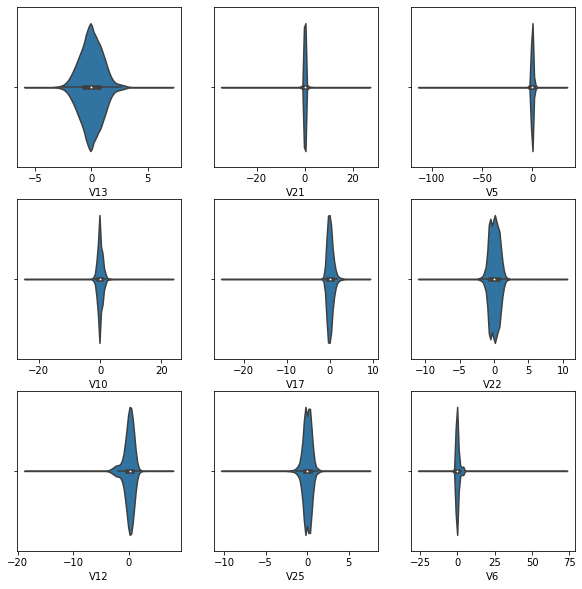

In [10]:
v_nums = [i for i in range(1, 29)]
v_choosed = random.choices(v_nums, k=9)
idx = 0

fig,ax =  plt.subplots(3,3, figsize=(10,10))
for i in range(3):
    for j in range(3):
        sns.violinplot(df["V"+str(v_choosed[idx])], ax = ax[i][j])
        idx += 1

J'ai étudié les variables entre `V1` et `V28`, et j'ai trouvé qu'elle ne sont pas corrélées. 

Ensuites, j'ai choisi 9 variables par hasard pour savoir la distribution des informations encodées de transactions. Les 9 sont centrées. Mais, il y a les outliers dans ces 9 variables.

### Time

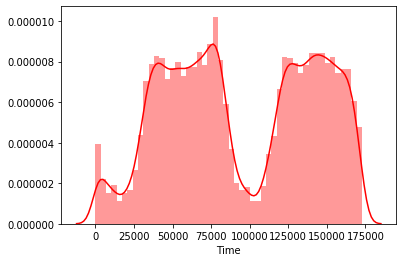

In [11]:
sns.distplot(df['Time'], color='red')

`Time` prend trop de l'importance parce qu'il a les valeurs grandes (comme 175000). Il doit être normalisé. 

### Amount

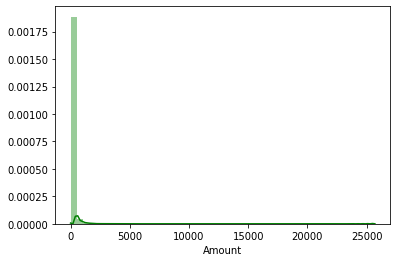

In [12]:
sns.distplot(df['Amount'], color='green')

On voit que la majorité de cette variable est petite(moins de 2500), mais il existe les transactions qui a plus de 25000 (outliers). Elle doit être normalisée.

### Class

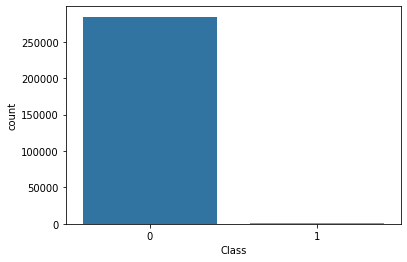

In [13]:
sns.countplot('Class', data=df)

In [14]:
print('Class 1 a {}% des individuels ({}).'.format(round(df['Class'].value_counts()[1]/len(df) * 100,2), df['Class'].value_counts()[1]))

Class 1 a 0.17% des individuels (492).


La plupart des transactions sont non frauduleuses. Si nous utilisons cette base de données comme base pour nos modèles prédictifs et nos analyses, nos algorithmes seront probablement overfitting car ils "supposeront" que la plupart des transactions ne sont pas de la fraude.

Il faut équilibrer ce dataset !

## Preparation des données (déjà fait dans data_loader)


### créer train set et test set 

### oversampling train set (SMOTE)

### Normaliser toutes les variables avec RobustScaler

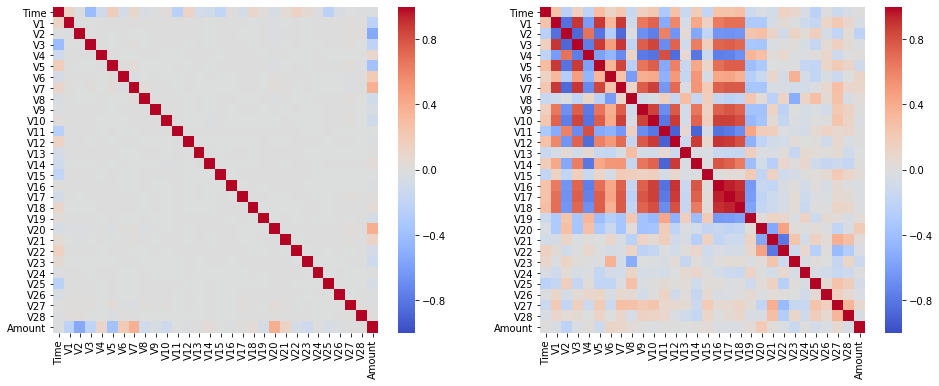

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
sns.heatmap(data_loader.raw_train_X.corr(), cmap='coolwarm', vmin= -1, vmax= 1, ax= ax[0])
sns.heatmap(data_loader.scaled_train_X.corr(), cmap='coolwarm', vmin= -1, vmax= 1, ax= ax[1])

In [16]:
# trouver les variables avec corr > 0.85 or < -0.85

oversampling_corr = data_loader.scaled_train_X.corr()
corr_threhold = abs(oversampling_corr) > 0.85
corr_variables = oversampling_corr.columns[corr_threhold.sum() > 1]
corr_variables

Index(['V1', 'V2', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16',
       'V17', 'V18'],
      dtype='object')

J'ai appliqué SMOTE pour équilibrer ce dataset. SMOTE génére les données de la class 1, et à la fin, les 2 classes ont le même nombre d'individuel. 

Par contre, SMOTE coréle les variables 'V1', 'V2', 'V3', 'V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16','V17', 'V18'.

# Création du modèle

J'ai appliqué les algorithmes populaires, et j'ai choisi le meilleur.

In [17]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier() 
}

## trouver le meilleur modèle

In [18]:
for key, classifier in classifiers.items():
    print('====================='+key+'=================')
    classifier.fit(data_loader.scaled_train_X, data_loader.sampled_train_y)
    y_pred = classifier.predict(data_loader.scaled_test_X)
    print(classification_report(data_loader.raw_test_y, y_pred))

=====================LogisiticRegression=================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.15      0.91      0.26       101

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962

=====================DecisionTreeClassifier=================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.48      0.79      0.60       101

    accuracy                           1.00     56962
   macro avg       0.74      0.90      0.80     56962
weighted avg       1.00      1.00      1.00     56962

=====================RandomForestClassifier=================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.86      0.86       101

  

J'ai entrainer les modèle sans modifier les hyper parametres. Je suis intéressé par la performance sur la classe 1 (les transactions frauduleuses). 

LogisticRegression a 0.91 du rappel sur la classe 1, mais il a 0,15 de la précision sur la classe 1. C'est-à-dire, il a trouvé presque toutes les transactions frauduleuses, mais, il a mal classifé beaucoup de transactions frauduleuses comme transactions innocentes.

La précision sur classe 1 de DecisionTreeClassifier est mieux que celle de LogisticRegression, mais le rappel est beaucoup pire que celui de LogisticRegression.

La précision et le rappel de RandomForest sont 0,86, beaucoup mieux que les autres !

## fine-tuning

J'ai appliqué Cross-Validation (CV) sur LogisiticRegression.

Il faut faire oversampling dans les itérations de CV puisque qu'on ne veut pas évaluer le modèle avec les données qui sont utilisées dans l'entrainement.

Donc, j'ai fair KFold sur train set. Ensuite, j'ai fait oversampling sur K-1 folds. A la fin, j'ai évaluer le modèle sur un fold dehors.

In [25]:
params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [26]:
tl.CV_SMOTE(data_loader.raw_train_X, data_loader.raw_train_y, LogisticRegression(), params, n_iter=4, K=5)

{'penalty': 'l2', 'C': 1}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45491
           1       0.09      0.87      0.16        78

    accuracy                           0.98     45569
   macro avg       0.54      0.93      0.58     45569
weighted avg       1.00      0.98      0.99     45569

{'penalty': 'l2', 'C': 0.01}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     45491
           1       0.04      0.82      0.08        78

    accuracy                           0.97     45569
   macro avg       0.52      0.90      0.53     45569
weighted avg       1.00      0.97      0.98     45569

{'penalty': 'l2', 'C': 0.01}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     45491
           1       0.04      0.87      0.08        78

    accuracy                           0.97     45569
   macro avg       0.52      0.92      0.53 

J'ai trouvé les meilleurs hyper parameters:
* penalty: l2
* C: 10

# évaluation le modèle

J'ai choisi RandomForest.

In [27]:
model =  RandomForestClassifier()
model.fit(data_loader.scaled_train_X, data_loader.sampled_train_y)

smote_prediction = model.predict(data_loader.scaled_test_X)
print(classification_report(data_loader.raw_test_y, smote_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.87      0.86      0.87       101

    accuracy                           1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Model works great on test set, too.

Pour améliorer:
1. Essayer les autres scaler.
2. Fine-tuning randomforest.
3. Essayer Auto-encoder.